In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# 模板的位置
template = "image/ocr_a_reference.png"

In [20]:
# 定义cv2展示函数
def cv2_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

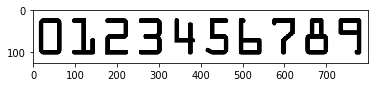

In [21]:
# 读取模板图像
img = cv2.imread(template)
cv2_show("img",img)
plt.imshow(img)

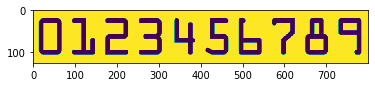

In [22]:
# 转灰度图
ref = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_show("ref",ref)
plt.imshow(ref)

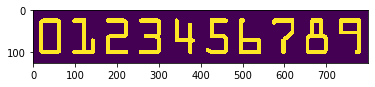

In [23]:
#二值化  黑白图
ref = cv2.threshold(ref,10,255,cv2.THRESH_BINARY_INV)[1]
cv2_show("ref",ref)
plt.imshow(ref)

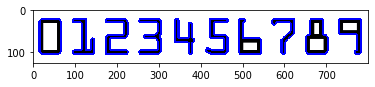

In [24]:
#cv2.findContours()函数接受的参数为二值图，即黑白的（不是灰度图）,cv2.RETR_EXTERNAL只检测外轮廓，cv2.CHAIN_APPROX_SIMPLE只保留终点坐标
#返回的list中每个元素都是图像中的一个轮廓
# 在二值化后的图像中计算轮廓
_,refCnts,hierarchy = cv2.findContours(ref.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# 在原图上画出轮廓
cv2.drawContours(img,refCnts,-1,(0,0,255),3)
cv2_show("img",img)
plt.imshow(img)

In [26]:
# 对框进行排序
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0

    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts] #用一个最小的矩形，把找到的形状包起来x,y,h,w
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))

    return cnts, boundingBoxes

In [27]:
print(np.array(refCnts).shape)
# 排序，从左到右，从上到下
refCnts = sort_contours(refCnts,method="left-to-right")[0] 
digits = {}

# 遍历每一个轮廓
for (i, c) in enumerate(refCnts):
    # 计算外接矩形并且resize成合适大小
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))

    # 每一个数字对应每一个模板
    digits[i] = roi

(10,)


C:\py\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
